In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',-1)

from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
import pickle

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)

In [3]:
application_train=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/application_train.csv')
columns_description=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/HomeCredit_columns_description.csv',
           encoding='ISO-8859-1')

In [6]:
application_test=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/application_test.csv')

application_train=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/application_train.csv')

prev_application=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/previous_application.csv')

installments_payments=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/installments_payments.csv')

pos_cash_bal=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/POS_CASH_balance.csv')

cc_balance=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/credit_card_balance.csv')

bureau=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/bureau.csv')

bureau_balance=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/bureau_balance.csv')

columns_description=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/HomeCredit_columns_description.csv',
           encoding='ISO-8859-1')

sample_submission=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/sample_submission.csv')


In [7]:
all_files_str=('application_test', 'application_train','prev_application','installments_payments','pos_cash_bal','cc_balance','bureau',
'bureau_balance','columns_description','sample_submission')

all_files=(application_test, application_train,prev_application,installments_payments,pos_cash_bal,cc_balance,
           bureau,bureau_balance,columns_description,sample_submission)

for x,y in zip(all_files_str,all_files):
    print ('filename:',x, '- rows:',y.shape[0],'and columns:',y.shape[1])

    

filename: application_test - rows: 48744 and columns: 121
filename: application_train - rows: 307511 and columns: 122
filename: prev_application - rows: 1670214 and columns: 37
filename: installments_payments - rows: 13605401 and columns: 8
filename: pos_cash_bal - rows: 10001358 and columns: 8
filename: cc_balance - rows: 3840312 and columns: 23
filename: bureau - rows: 1716428 and columns: 17
filename: bureau_balance - rows: 27299925 and columns: 3
filename: columns_description - rows: 219 and columns: 5
filename: sample_submission - rows: 48744 and columns: 2


In [6]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [10]:
# checking if columns have been removed. For eg train and test data has come down to 71 and 72 columns

for x,y in zip(all_files_str,all_files):
    print ('filename:',x, '- rows:',y.shape[0],'and columns:',y.shape[1])

filename: application_test - rows: 48744 and columns: 121
filename: application_train - rows: 307511 and columns: 122
filename: prev_application - rows: 1670214 and columns: 37
filename: installments_payments - rows: 13605401 and columns: 8
filename: pos_cash_bal - rows: 10001358 and columns: 8
filename: cc_balance - rows: 3840312 and columns: 23
filename: bureau - rows: 1716428 and columns: 17
filename: bureau_balance - rows: 27299925 and columns: 3
filename: columns_description - rows: 219 and columns: 5
filename: sample_submission - rows: 48744 and columns: 2


In [9]:
# baseline accuracy
application_train=application_train.copy()
at=application_train.copy()
at.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
# imbalanced class
application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [11]:
# imputing missing values in 'object' type features in application_train

c=application_train.columns    
object_col=[]
object_col = [c[i] for i in range(len(c)) if application_train.dtypes[i]=='object']
object_col

nul=application_train.select_dtypes(include=['object']).isnull().sum()
object_col_null=[nul.index[i] for i in range(len(nul)) if nul[i]!=0 ]
object_col_null

# filling nan with higher value count or other relevant info
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)
application_train['OCCUPATION_TYPE'].fillna('Not Specified',inplace=True)
application_train['EMERGENCYSTATE_MODE'].fillna('None',inplace=True)

# creating a new feature for marital status indicating single or otherwise
application_train['MARITAL_STATUS'] = np.where(application_train["NAME_FAMILY_STATUS"].str.contains("Single"), 0,1)
# dropping family status
application_train.drop('NAME_FAMILY_STATUS',inplace=True,axis=1)

# 31% null values converted to 'Not specified' which was NOT an existing type in the feature
application_train['ACCOMPANIED'] = np.where(application_train["NAME_TYPE_SUITE"].str.contains("Unaccompanied"), 0,1)
application_train.drop('NAME_TYPE_SUITE',inplace=True,axis=1)

application_train['FLAG_OWN_CAR']=np.where(application_train['FLAG_OWN_CAR'].str.contains("N"), 0,1)


df_float=application_train.select_dtypes(include=['float64'])
application_train['HOUSING_AVERAGE']=df_float.iloc[:,df_float.columns.str.contains("_AVG")].sum(axis=1)

df_float=application_train.select_dtypes(include=['float64'])
application_train['HOUSING_MOD']=df_float.iloc[:,df_float.columns.str.contains("_MODE")].sum(axis=1)

df_float=application_train.select_dtypes(include=['float64'])
application_train['HOUSING_MEDI']=df_float.iloc[:,df_float.columns.str.contains("_MEDI")].sum(axis=1)

coltodrop=application_train.columns[application_train.columns.str.contains("_AVG")]
application_train.drop(coltodrop,inplace=True,axis=1)

coltodrop=application_train.columns[application_train.columns.str.contains("_MODE")]
application_train.drop(coltodrop,inplace=True,axis=1)

coltodrop=application_train.columns[application_train.columns.str.contains("_MEDI")]
application_train.drop(coltodrop,inplace=True,axis=1)

df_float=application_train.select_dtypes(include=['float64'])
application_train['DOCUMENT_SUBMISSION']=df_float.iloc[:,df_float.columns.str.contains("FLAG_DOCUMENT_")].sum(axis=1)

coltodrop=application_train.columns[application_train.columns.str.contains("FLAG_DOCUMENT_")]
application_train.drop(coltodrop,inplace=True,axis=1)


flags_contact_details=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
             'FLAG_EMAIL','FLAG_OWN_CAR']

application_train['flags_contact']=application_train[flags_contact_details].sum(axis=1)
application_train.drop(flags_contact_details,inplace=True,axis=1)

application_train.drop('WEEKDAY_APPR_PROCESS_START',inplace=True,axis=1)


In [12]:
# # combining varoius external sources credit info about clients
# application_train['EXT_SOURCE']=application_train['EXT_SOURCE_1']+application_train['EXT_SOURCE_2']\
# +application_train['EXT_SOURCE_3']
# application_train.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True,axis=1)

In [13]:
# df_float=application_train.select_dtypes(include=['float64'])
# application_train['DOCUMENT_SUBMISSION']=df_float.iloc[:,df_float.columns.str.contains("FLAG_DOCUMENT_")].sum(axis=1)

# coltodrop=application_train.columns[application_train.columns.str.contains("FLAG_DOCUMENT_")]
# application_train.drop(coltodrop,inplace=True,axis=1)


In [14]:
# imputing missing values in 'float64' type features in application_train
c=application_train.columns    
object_col=[]
object_col = [c[i] for i in range(len(c)) if (application_train.dtypes[i]=='float64' and 'AMT' in c[i])]
object_col

nul=application_train[object_col].isnull().sum()
object_col_null=[nul.index[i] for i in range(len(nul)) if nul[i]!=0 ]

object_col_null

# featurs with CNT were imputed with 0 after reviewing them
application_train['CNT_FAM_MEMBERS'].fillna(0,inplace=True)
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
application_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
application_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
application_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

# using credit amount as a factor to fill in null values in annuity and Good
m1=(application_train['AMT_ANNUITY']/application_train['AMT_CREDIT']).mean()
application_train['AMT_ANNUITY']=application_train['AMT_ANNUITY'].combine_first(application_train['AMT_CREDIT']*m1)

m2=(application_train['AMT_GOODS_PRICE']/application_train['AMT_CREDIT']).mean()
application_train['AMT_GOODS_PRICE']=application_train['AMT_GOODS_PRICE'].combine_first(application_train['AMT_CREDIT']*m2)

# calls made to bureau before the credit application 
application_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)
application_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)
application_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)
application_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)
application_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)
application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)

In [15]:
# observations & defaults of client's social surroundings for 30 & 60 DPD (days past due) after dropping nans
# no improvement in taking a ratio so will keep the features as is
p=pd.DataFrame()
# p['def/obs 30 dpd']=application_train[object_col_null[13]]/application_train[object_col_null[12]]
# p['def/obs 60 dpd']=application_train[object_col_null[15]]/application_train[object_col_null[14]]
p['def 30']=application_train['DEF_30_CNT_SOCIAL_CIRCLE']
p['def 60']=application_train['DEF_60_CNT_SOCIAL_CIRCLE']
p['credit to annuity']=application_train['AMT_CREDIT']/application_train['AMT_ANNUITY']
p['Target']=application_train['TARGET']
p.corr()

,def 30,def 60,credit to annuity,Target
def 30,1.000000,0.860556,-0.005968,0.032394
def 60,0.860556,1.000000,-0.009044,0.031401
credit to annuity,-0.005968,-0.009044,1.000000,-0.032097
Target,0.032394,0.031401,-0.032097,1.000000


In [16]:
## imputing missing values in other 'float64' type features with the respective means
# Normalized score from external data source 
# Normalized information about building where the client lives
# How many days before application did client change phone

c=application_train.columns    
float_col2=[]
float_col2 = [c[i] for i in range(len(c)) if (application_train.dtypes[i]=='float64')]
float_col2

nul=application_train[float_col2].isnull().sum()
float_col_null2=[nul.index[i] for i in range(len(nul)) if nul[i]!=0 ]

float_col_null2

for i in float_col_null2:
    application_train[i].fillna(application_train[i].mean(),inplace=True)
float_col_null2

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [17]:
application_train1=application_train.set_index('SK_ID_CURR')

In [24]:
# application_train1.to_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/application_train_clean19')

In [22]:
application_train1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,MARITAL_STATUS,ACCOMPANIED,HOUSING_AVERAGE,HOUSING_MOD,DOCUMENT_SUBMISSION,flags_contact
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,0.018801,-9461,-637,-3648.0,-2120,12.061091,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2.0207,2.0559,0.0,4
100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,House / apartment,0.003541,-16765,-1188,-1186.0,-291,12.061091,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,0.311267,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2.8888,2.9437,0.0,4
100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.000000,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0.502130,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000,0.0000,0.0,6
100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,12.061091,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.502130,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0000,0.0000,0.0,3
100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,12.061091,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,0.502130,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000,0.0000,0.0,3


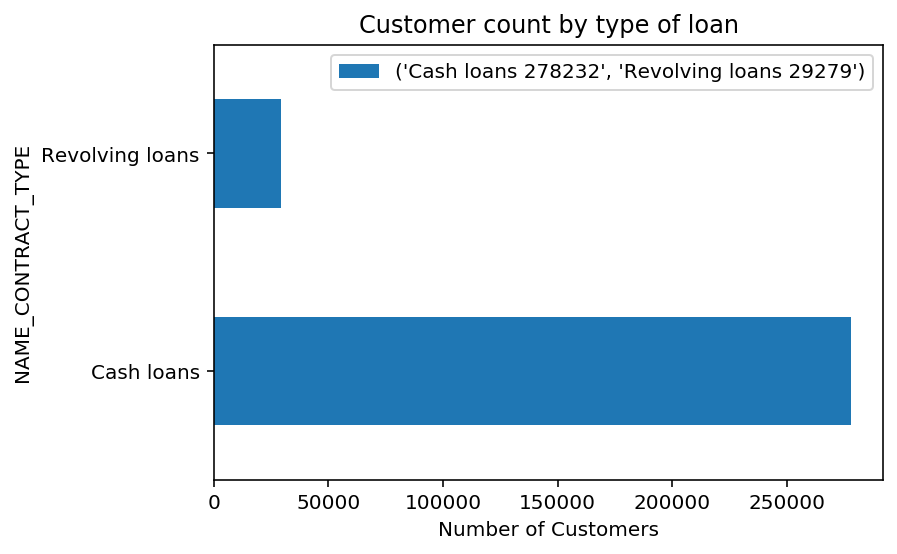

In [24]:
# Chart - Types of loans
application_train.groupby(['NAME_CONTRACT_TYPE']).agg({'count'}).iloc[:2,:1].plot(kind='barh')
plt.title('Customer count by type of loan')
plt.xlabel('Number of Customers')
plt.legend([('Cash loans {}'.format(application_train.groupby(['NAME_CONTRACT_TYPE']).agg({'count'}).iloc[0,0]),
            'Revolving loans {}'.format(application_train.groupby(['NAME_CONTRACT_TYPE']).agg({'count'}).iloc[1,0]))])
plt.show()

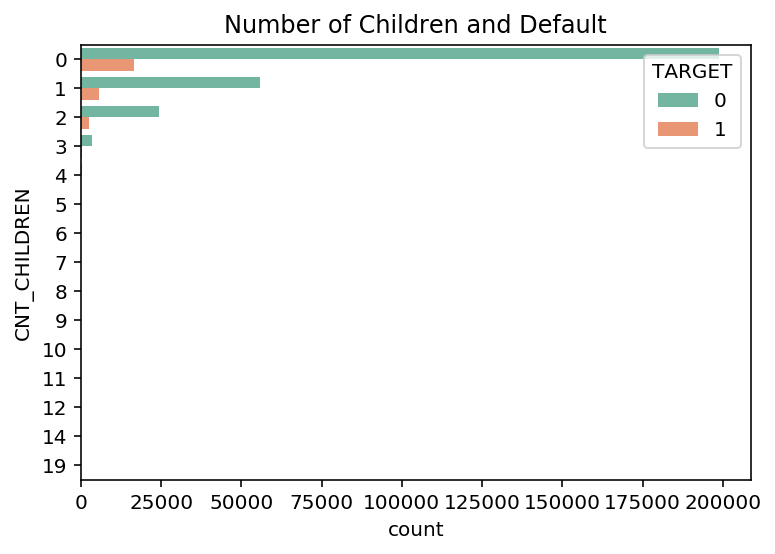

In [31]:
ax = sns.countplot(y='CNT_CHILDREN', hue='TARGET',data=at,orient='v', palette='Set2').set_title('Number of Children and Default')


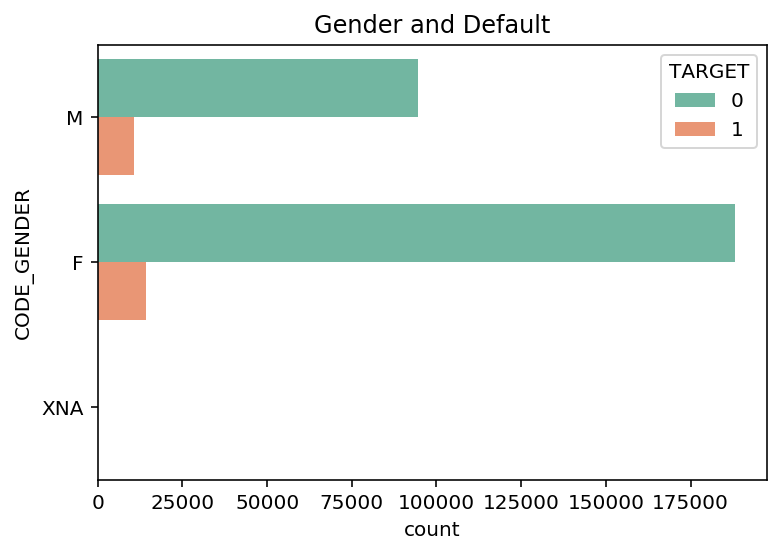

In [44]:
ax = sns.countplot(y='CODE_GENDER', hue='TARGET',data=at,orient='v', palette='Set2').set_title('Gender and Default')


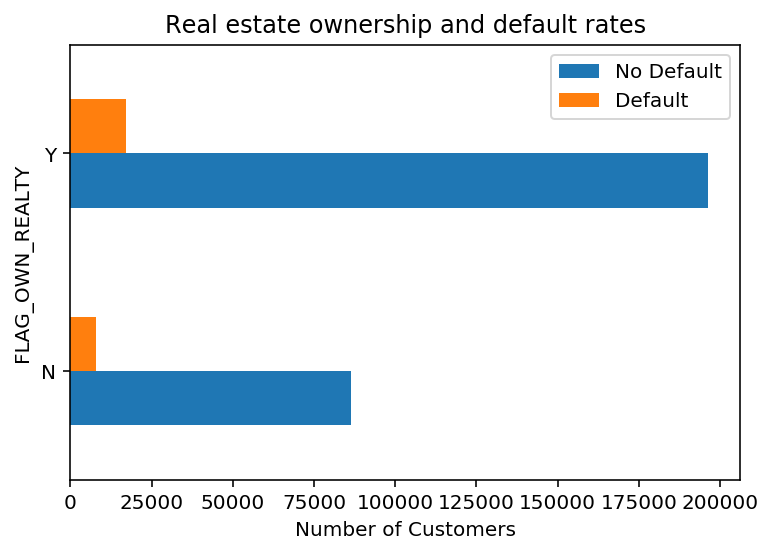

In [206]:
# application_train.groupby('TARGET').agg({'sum'})

application_train.groupby(['FLAG_OWN_REALTY','TARGET']).agg({'count'}).unstack().iloc[:,:2].plot(kind='barh',
                                                                                     label='label')
plt.title('Real estate ownership and default rates')
plt.xlabel('Number of Customers')
plt.legend(['No Default', 'Default'])
plt.show()

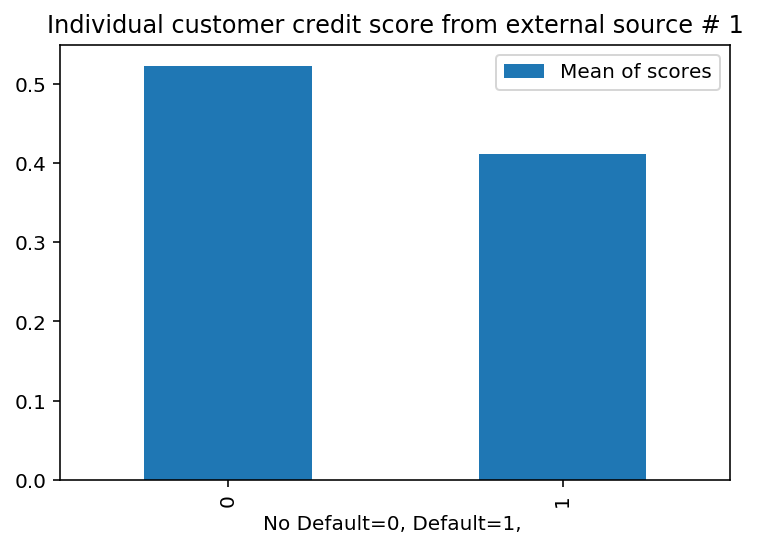

In [54]:
application_train.groupby('TARGET').agg({'mean'})  ['EXT_SOURCE_2'].plot(kind='bar')

plt.title('Individual customer credit score from external source # 1')
plt.xlabel('No Default=0, Default=1, ')
plt.legend(['Mean of scores'])
plt.show()

In [ ]:
# description[['Row','Description']][:20]
columns_description
# description
# columns_description

In [60]:
application_train.groupby('TARGET')['EXT_SOURCE_2'].mean()

TARGET
0    147974.566745
1    10206.838869 
Name: EXT_SOURCE_2, dtype: float64

In [53]:
columns_description[columns_description['Row']=='NAME_GOODS_CATEGORY']

,Unnamed: 0,Table,Row,Description,Special
196,199,previous_application.csv,NAME_GOODS_CATEGORY,What kind of goods did the client apply for in the previous application,NaN
